#Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def Search_Some(dataset,some):
  d={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      d[col] = rows
  
  return d



def divide_dataset(dataset,numOrper,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    if type(numOrper) == int:
      return dataset.iloc[:numOrper,:]
    else:
      return dataset.iloc[:int(rows*(numOrper)),:]
  else:
    import random
    if type(numOrper) == int:
      l_r = random.sample(range(0, rows), numOrper)
    else:
      l_r = random.sample(range(0, rows), int(rows*(numOrper)))
    return dataset.iloc[l_r,:]

#numpy and pandas

In [68]:
import numpy as np
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx')
target="Type"

In [69]:
df.shape

(888817, 13)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888817 entries, 0 to 888816
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Subject  888817 non-null  object 
 1   Type     888817 non-null  object 
 2   Cycle    888817 non-null  int64  
 3   Time     888817 non-null  float64
 4   RR-I     888817 non-null  float64
 5   HR       888817 non-null  float64
 6   R-H      888817 non-null  float64
 7   P-H      888817 non-null  float64
 8   QRS      888817 non-null  float64
 9   PRQ      888817 non-null  float64
 10  QT       888817 non-null  float64
 11  QTC      888817 non-null  float64
 12  ST       888817 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 88.2+ MB


In [71]:
df.head()

Subject      Type  Cycle   Time   RR-I         HR    R-H    P-H    QRS  \
0      E1  ischemic      1  1.072  0.932  64.377682  3.305  3.810  0.088   
1      E1  ischemic      2  2.004  1.004  59.760956  3.285  3.810  0.100   
2      E1  ischemic      3  3.008  0.996  60.240964  3.340  3.830  0.128   
3      E1  ischemic      4  4.004  1.016  59.055118  3.325  3.810  0.108   
4      E1  ischemic      5  5.020  0.972  61.728395  3.290  3.765  0.100   

     PRQ     QT       QTC     ST  
0  0.160  0.384  0.397762  0.296  
1  0.160  0.640  0.638724  0.540  
2  0.148  0.628  0.629260  0.500  
3  0.172  0.388  0.384933  0.280  
4  0.160  0.372  0.377320  0.272

In [ ]:
dataset = divide_dataset(df,30000,1)
dataset[target].value_counts() 

ischemic      19592
healthy        9092
arrhythmic     1316
Name: Type, dtype: int64

In [57]:
dataset.shape

(30000, 14)

In [29]:
dataset.head()

Subject      Type   Cycle      Time   RR-I          HR     R-H    P-H  \
711275     F20   healthy  6475.0  5343.628  0.980   61.224490  10.728  8.136   
331985     E46  ischemic  6244.0  3006.656  0.492  121.951219   0.350 -0.270   
384444     E54  ischemic   749.0   602.420  0.688   87.209302  -3.350 -4.605   
434162     E60  ischemic  3653.0  3355.676  0.824   72.815534  -1.070 -2.125   
594170      F2   healthy  6051.0  6423.340  1.060   56.603770   9.624  8.440   

          QRS    PRQ     QT       QTC     ST  
711275  0.080  0.144  0.396  0.400020  0.332  
331985  0.092  0.176  0.312  0.444807  0.232  
384444  0.084  0.108  0.372  0.448486  0.288  
434162  0.144  0.220  0.424  0.467092  0.320  
594170  0.092  0.160  0.456  0.442910  0.384

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 711275 to 389907
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Subject  30000 non-null  object 
 1   Type     30000 non-null  object 
 2   Cycle    29999 non-null  float64
 3   Time     29999 non-null  float64
 4   RR-I     29999 non-null  float64
 5   HR       29999 non-null  float64
 6   R-H      29999 non-null  float64
 7   P-H      29999 non-null  float64
 8   QRS      29999 non-null  float64
 9   PRQ      29999 non-null  float64
 10  QT       29999 non-null  float64
 11  QTC      29999 non-null  float64
 12  ST       29999 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.2+ MB


In [31]:
dataset.describe()

Cycle          Time          RR-I            HR           R-H  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean    4126.327544   3457.686357      0.877839     72.633824      1.507046   
std     2754.558435   2096.740373      0.215131     18.509661      4.290291   
min        1.000000      1.025000      0.228000     17.241379    -12.500000   
25%     1781.000000   1584.956000      0.716000     58.365759     -0.930000   
50%     3870.000000   3418.288000      0.860000     69.767442      0.700000   
75%     6082.000000   5273.680000      1.028000     83.798883      2.410445   
max    14866.000000   7291.732000      3.480000    263.157895     13.056000   

                P-H           QRS           PRQ            QT           QTC  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean       0.532561      0.096464      0.167550      0.415144      0.447627   
std        3.959368      0.026855      0.032733      0.070373      0.059405   
min       -9.814450      0.052000      0.000000      0.156000      0.224816   
25%       -1.730000      0.080000      0.144000      0.376000      0.411420   
50%       -0.048830      0.092000      0.164000      0.408000      0.436220   
75%        1.790000      0.108000      0.188000      0.444000      0.468253   
max       16.380000      0.440000      0.372000      0.936000      0.840779   

                 ST  
count  29999.000000  
mean       0.333486  
std        0.068958  
min        0.056000  
25%        0.296000  
50%        0.332000  
75%        0.364000  
max        0.876000

#Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['arrhythmic' 'healthy' 'ischemic']
After encoding: {0, 1, 2}


<ipython-input-33-9cced9d58395>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[target]=encoder.fit_transform(dataset[target])


In [34]:
#from label encoder the actual values were changed 
classes_dict={
    0: "arrhythmic",
    1: "healthy",
    2: "ischemic"
}

#Dataset spliting to X and y

And removing unwanted columns

In [35]:
X = dataset.loc[:, dataset.columns!=target]     #removing target column (classes)
X = X.loc[:, X.columns!="Subject"]              #removing 'Subjec' column
X = X.loc[:, X.columns!="Cycle"]                #removing 'Cycle' column
#X = X.loc[:, X.columns!="Time"]                 #removing 'Time' column if you want, un-comment it
y = dataset[target]

list_of_feat = X.columns

In [36]:
X.head()

Time   RR-I          HR     R-H    P-H    QRS    PRQ     QT  \
711275  5343.628  0.980   61.224490  10.728  8.136  0.080  0.144  0.396   
331985  3006.656  0.492  121.951219   0.350 -0.270  0.092  0.176  0.312   
384444   602.420  0.688   87.209302  -3.350 -4.605  0.084  0.108  0.372   
434162  3355.676  0.824   72.815534  -1.070 -2.125  0.144  0.220  0.424   
594170  6423.340  1.060   56.603770   9.624  8.440  0.092  0.160  0.456   

             QTC     ST  
711275  0.400020  0.332  
331985  0.444807  0.232  
384444  0.448486  0.288  
434162  0.467092  0.320  
594170  0.442910  0.384

#Dataset Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

#Dataset spliting for training and testing

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
y_train.value_counts()

2    15683
1     7212
0     1105
Name: Type, dtype: int64

#Dataset Balancing

In [40]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

In [19]:
y_train.value_counts()

0    12986
2    12986
1    12986
Name: Type, dtype: int64

#Training 

##With Default parameters

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 214    1    7]
 [   3 1534   23]
 [  30   16 3172]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       222
           1       0.99      0.98      0.99      1560
           2       0.99      0.99      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.98      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.984


##Tunning <i>n_estimators</i>

  7%|▋         | 2/30 [00:00<00:03,  7.32it/s]

1/30 round completed......................... Accurecy: 0.9562
2/30 round completed......................... Accurecy: 0.9476


 10%|█         | 3/30 [00:00<00:05,  5.22it/s]

3/30 round completed......................... Accurecy: 0.9716


 13%|█▎        | 4/30 [00:00<00:06,  3.90it/s]

4/30 round completed......................... Accurecy: 0.972


 17%|█▋        | 5/30 [00:01<00:08,  3.07it/s]

5/30 round completed......................... Accurecy: 0.9772


 20%|██        | 6/30 [00:01<00:09,  2.54it/s]

6/30 round completed......................... Accurecy: 0.9774


 23%|██▎       | 7/30 [00:02<00:10,  2.14it/s]

7/30 round completed......................... Accurecy: 0.979


 27%|██▋       | 8/30 [00:03<00:11,  1.85it/s]

8/30 round completed......................... Accurecy: 0.9804


 30%|███       | 9/30 [00:04<00:12,  1.62it/s]

9/30 round completed......................... Accurecy: 0.9802


 33%|███▎      | 10/30 [00:04<00:13,  1.45it/s]

10/30 round completed......................... Accurecy: 0.982


 37%|███▋      | 11/30 [00:05<00:14,  1.29it/s]

11/30 round completed......................... Accurecy: 0.9832


 40%|████      | 12/30 [00:06<00:15,  1.17it/s]

12/30 round completed......................... Accurecy: 0.9826


 43%|████▎     | 13/30 [00:08<00:16,  1.06it/s]

13/30 round completed......................... Accurecy: 0.9828


 47%|████▋     | 14/30 [00:09<00:16,  1.04s/it]

14/30 round completed......................... Accurecy: 0.9824


 50%|█████     | 15/30 [00:10<00:16,  1.13s/it]

15/30 round completed......................... Accurecy: 0.983


 53%|█████▎    | 16/30 [00:11<00:16,  1.21s/it]

16/30 round completed......................... Accurecy: 0.982


 57%|█████▋    | 17/30 [00:13<00:16,  1.28s/it]

17/30 round completed......................... Accurecy: 0.9838


 60%|██████    | 18/30 [00:15<00:16,  1.37s/it]

18/30 round completed......................... Accurecy: 0.9828


 63%|██████▎   | 19/30 [00:16<00:15,  1.45s/it]

19/30 round completed......................... Accurecy: 0.9828


 67%|██████▋   | 20/30 [00:18<00:15,  1.54s/it]

20/30 round completed......................... Accurecy: 0.983


 70%|███████   | 21/30 [00:20<00:14,  1.65s/it]

21/30 round completed......................... Accurecy: 0.9832


 73%|███████▎  | 22/30 [00:22<00:14,  1.75s/it]

22/30 round completed......................... Accurecy: 0.984


 77%|███████▋  | 23/30 [00:24<00:12,  1.84s/it]

23/30 round completed......................... Accurecy: 0.983


 80%|████████  | 24/30 [00:26<00:11,  1.92s/it]

24/30 round completed......................... Accurecy: 0.9836


 83%|████████▎ | 25/30 [00:28<00:10,  2.02s/it]

25/30 round completed......................... Accurecy: 0.9826


 87%|████████▋ | 26/30 [00:31<00:08,  2.12s/it]

26/30 round completed......................... Accurecy: 0.983


 90%|█████████ | 27/30 [00:33<00:06,  2.21s/it]

27/30 round completed......................... Accurecy: 0.9828


 93%|█████████▎| 28/30 [00:35<00:04,  2.30s/it]

28/30 round completed......................... Accurecy: 0.9832


 97%|█████████▋| 29/30 [00:38<00:02,  2.37s/it]

29/30 round completed......................... Accurecy: 0.9826


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]

30/30 round completed......................... Accurecy: 0.9836
The best n_estimators:
22


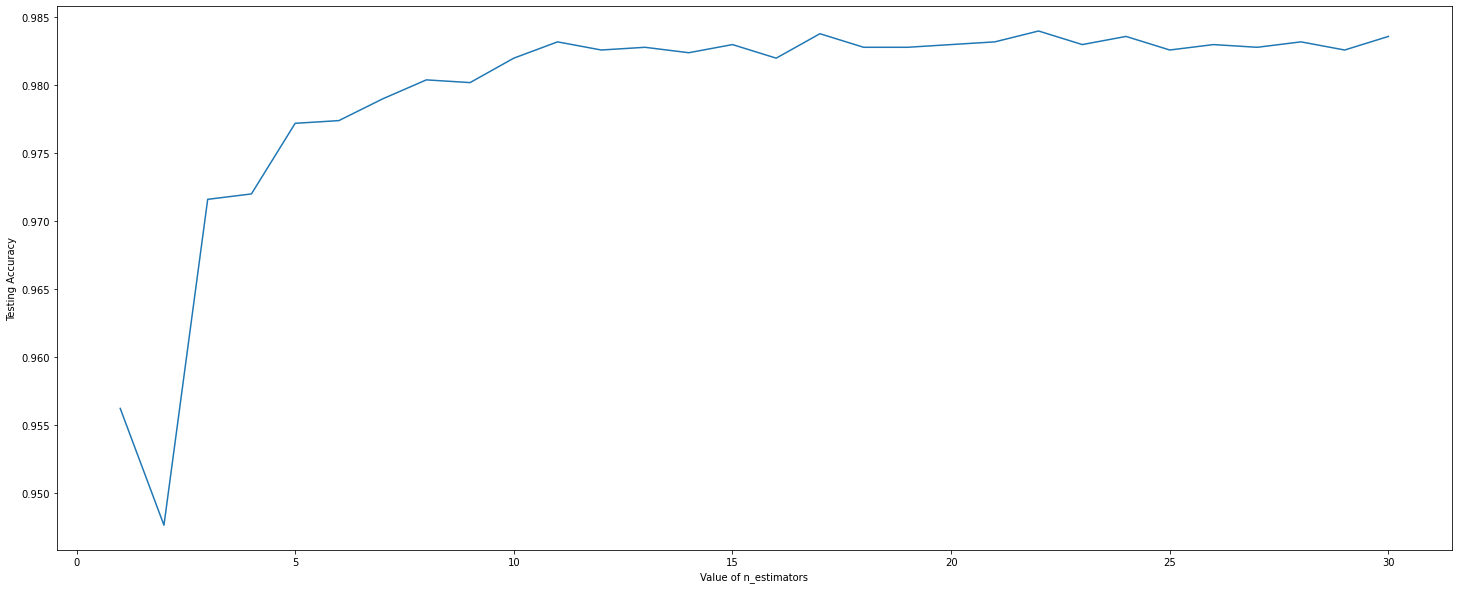

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning <i>max_depth</i>

  3%|▎         | 1/30 [00:01<00:42,  1.47s/it]

1/30 round completed......................... Accurecy: 0.6628


  7%|▋         | 2/30 [00:03<00:54,  1.96s/it]

2/30 round completed......................... Accurecy: 0.7268


 10%|█         | 3/30 [00:06<01:05,  2.41s/it]

3/30 round completed......................... Accurecy: 0.7888


 13%|█▎        | 4/30 [00:10<01:16,  2.93s/it]

4/30 round completed......................... Accurecy: 0.8316


 17%|█▋        | 5/30 [00:14<01:25,  3.41s/it]

5/30 round completed......................... Accurecy: 0.8872


 20%|██        | 6/30 [00:19<01:34,  3.93s/it]

6/30 round completed......................... Accurecy: 0.91


 23%|██▎       | 7/30 [00:25<01:43,  4.48s/it]

7/30 round completed......................... Accurecy: 0.923


 27%|██▋       | 8/30 [00:31<01:49,  4.98s/it]

8/30 round completed......................... Accurecy: 0.9436


 30%|███       | 9/30 [00:37<01:55,  5.49s/it]

9/30 round completed......................... Accurecy: 0.9518


 33%|███▎      | 10/30 [00:44<01:59,  5.97s/it]

10/30 round completed......................... Accurecy: 0.9616


 37%|███▋      | 11/30 [00:52<02:01,  6.38s/it]

11/30 round completed......................... Accurecy: 0.9692


 40%|████      | 12/30 [00:59<02:01,  6.77s/it]

12/30 round completed......................... Accurecy: 0.9728


 43%|████▎     | 13/30 [01:07<02:00,  7.11s/it]

13/30 round completed......................... Accurecy: 0.9738


 47%|████▋     | 14/30 [01:15<01:58,  7.43s/it]

14/30 round completed......................... Accurecy: 0.9766


 50%|█████     | 15/30 [01:24<01:56,  7.74s/it]

15/30 round completed......................... Accurecy: 0.9818


 53%|█████▎    | 16/30 [01:32<01:51,  7.98s/it]

16/30 round completed......................... Accurecy: 0.9826


 57%|█████▋    | 17/30 [01:41<01:46,  8.16s/it]

17/30 round completed......................... Accurecy: 0.9838


 60%|██████    | 18/30 [01:50<01:39,  8.33s/it]

18/30 round completed......................... Accurecy: 0.9834


 63%|██████▎   | 19/30 [01:59<01:33,  8.46s/it]

19/30 round completed......................... Accurecy: 0.9848


 67%|██████▋   | 20/30 [02:07<01:25,  8.53s/it]

20/30 round completed......................... Accurecy: 0.9836


 70%|███████   | 21/30 [02:16<01:17,  8.66s/it]

21/30 round completed......................... Accurecy: 0.9842


 73%|███████▎  | 22/30 [02:25<01:10,  8.76s/it]

22/30 round completed......................... Accurecy: 0.9838


 77%|███████▋  | 23/30 [02:34<01:01,  8.80s/it]

23/30 round completed......................... Accurecy: 0.9846


 80%|████████  | 24/30 [02:43<00:52,  8.79s/it]

24/30 round completed......................... Accurecy: 0.9854


 83%|████████▎ | 25/30 [02:52<00:44,  8.80s/it]

25/30 round completed......................... Accurecy: 0.9848


 87%|████████▋ | 26/30 [03:01<00:35,  8.83s/it]

26/30 round completed......................... Accurecy: 0.985


 90%|█████████ | 27/30 [03:10<00:26,  8.87s/it]

27/30 round completed......................... Accurecy: 0.9842


 93%|█████████▎| 28/30 [03:18<00:17,  8.89s/it]

28/30 round completed......................... Accurecy: 0.9852


 97%|█████████▋| 29/30 [03:27<00:08,  8.90s/it]

29/30 round completed......................... Accurecy: 0.9842


100%|██████████| 30/30 [03:36<00:00,  7.23s/it]

30/30 round completed......................... Accurecy: 0.9846
The best Depth:
24


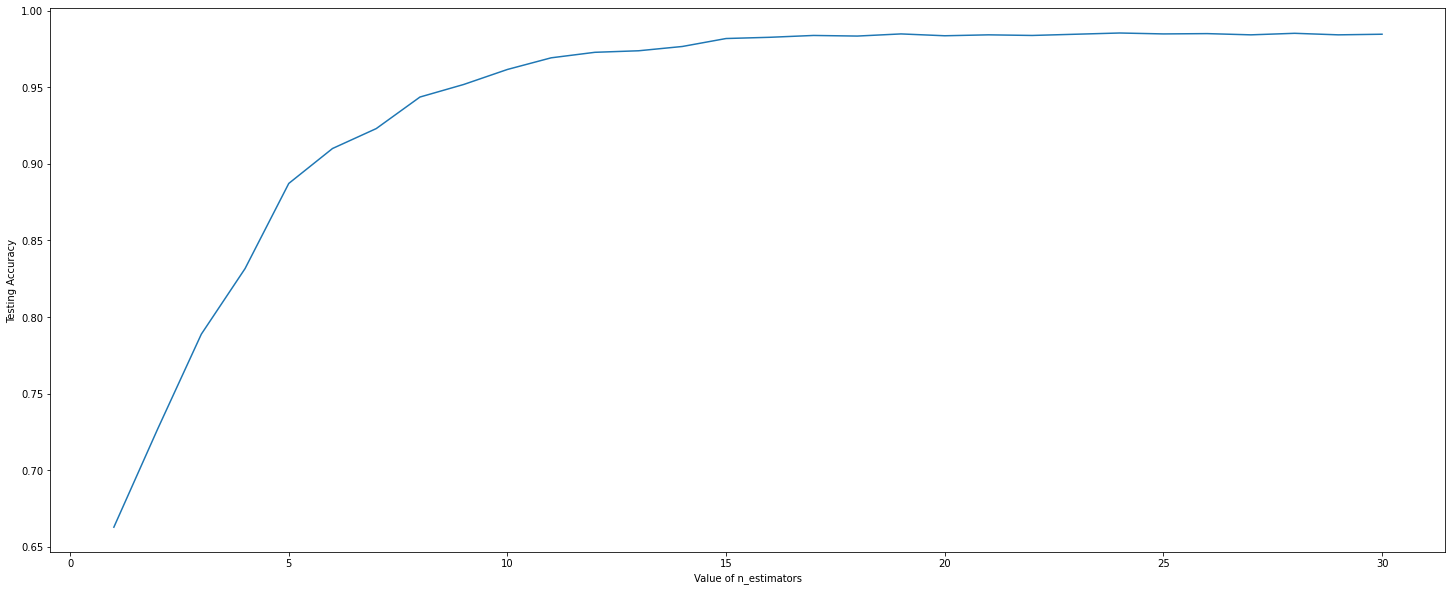

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


##Result for best estimator

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 214    2    6]
 [   4 1534   22]
 [  34   23 3161]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       222
           1       0.98      0.98      0.98      1560
           2       0.99      0.98      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.94      0.98      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.9818


##Result for best depth

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 216    0    6]
 [   2 1537   21]
 [  26   20 3172]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       222
           1       0.99      0.99      0.99      1560
           2       0.99      0.99      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.98      0.97      5000
weighted avg       0.99      0.98      0.99      5000

Accurecy:  0.985


##Results for best estimator and best depth

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 212    1    9]
 [   3 1539   18]
 [  30   24 3164]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       222
           1       0.98      0.99      0.99      1560
           2       0.99      0.98      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.97      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.983


#Set the model to be explained and visualization

<font color='coral'>Caution:</font> Please set the <i>trained_model</i> before proceeding

In [26]:
trained_model = rf_default
#trained_model = rf_depth
#trained_model = rf_estimator
#trained_model = rf_all

#Visualization

##ROC CURVE

In [27]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.0 MB/s eta 0:00:00


In [28]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC_1(model,lebel_dict):

  y_scores = model.predict_proba(X_test)

  y_onehot = pd.get_dummies(y_test, columns=model.classes_)

  fig = go.Figure()
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  for i in range(y_scores.shape[1]):
      y_true = y_onehot.iloc[:, i]
      y_score = y_scores[:, i]

      fpr, tpr, _ = roc_curve(y_true, y_score)
      auc_score = roc_auc_score(y_true, y_score)
      name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
      fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

  fig.update_layout(
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      yaxis=dict(scaleanchor="x", scaleratio=1),
      xaxis=dict(constrain='domain'),
      width=1000, height=1000,
      font=dict(
        family="Courier New, monospace",
        size=20,
        color="BLack"
    ),
    legend=dict(
        x=0.67,
        y=0.05,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
  )
  fig.show()



ploty_ROC_1(trained_model,classes_dict)

#Confusion Matrix

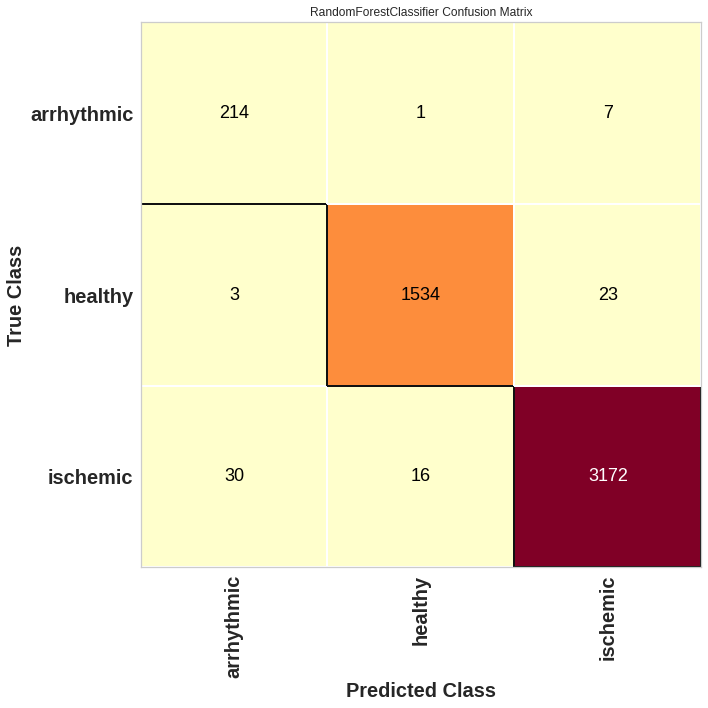

--------------------
--------------------


In [29]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")


attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}


Conf_Mat(X_test,y_test,attributes,trained_model,classes)
     
     

#XAI

##SHAP (SHapley Additive exPlanations)

<font color='coral'> Docmumentation: </font> <a href = "https://shap.readthedocs.io/en/latest/#:~:text=SHAP%20(SHapley%20Additive%20exPlanations)%20is,papers%20for%20details%20and%20citations).">Click Here</a>

In [30]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00


###Local Explainer

In [32]:
import shap
shap.initjs()

explainer_local = shap.TreeExplainer(trained_model)

start_index = 1      #set the starting index of the row to be explained
end_index = 10       #set the ending index of the row to be explained


shap_values = explainer_local.shap_values(X_test[start_index:end_index])

In [33]:
shap.initjs()
# Force plot

shap.force_plot(explainer_local.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names = list_of_feat) # for values

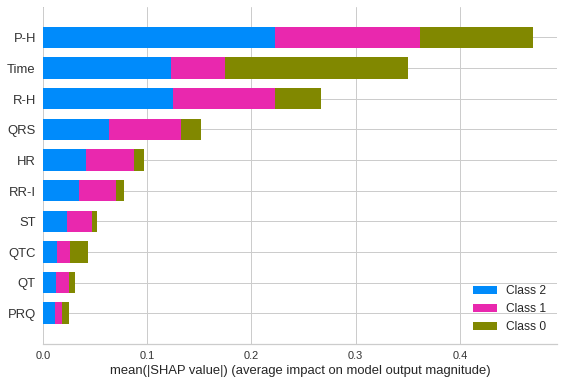

In [34]:
shap.summary_plot(shap_values, X_test,feature_names=list_of_feat)

###Global Explainer

In [35]:
def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

Models:  RandomForestClassifier()


Exact explainer: 5001it [1:15:42,  1.10it/s]


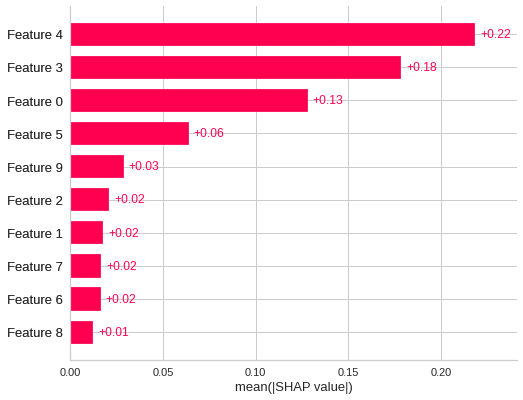

---------------------


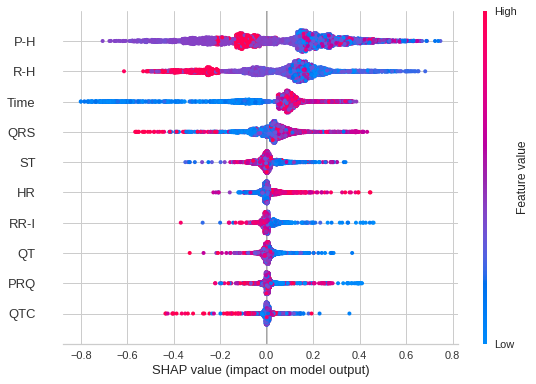

---------------------
Local Explaination


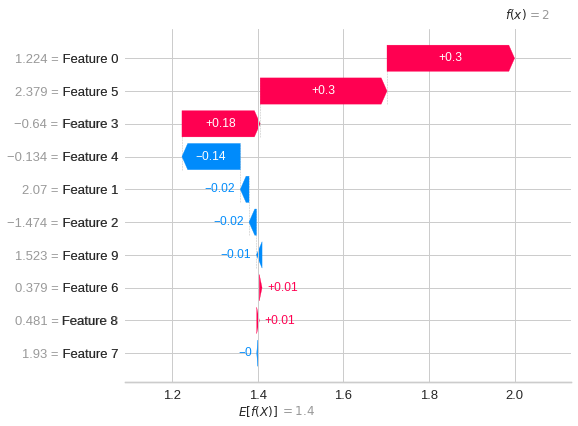

---------------------


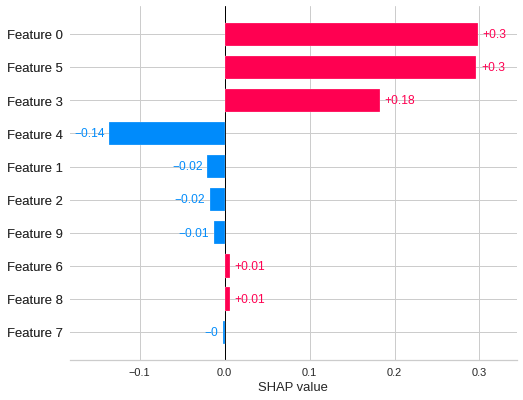

In [36]:

graph_feat={
    "max_display":20,
    "shap_values Index":2
}


SHAP_EXP(trained_model,graph_feat)
    

##LIME
<font color='coral'> Docmumentation: </font> <a href = "https://pypi.org/project/lime/">Click Here</a>


In [37]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=45ada3f8f10f472428aec80d47f9b3051056debc4302eeb3adb82eddb60dbc0a
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [38]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list_of_feat,
    class_names=classes,
    mode='classification'
)

In [41]:
explain_row = 100

In [46]:
print("Actual value of test row: ", classes_dict[y_test.iloc[100]])

Actual value of test row:  healthy


1

In [43]:
exp = explainer.explain_instance(X_test[explain_row],                  #index of row, which will be explained
                                 trained_model.predict_proba,
                                 num_features=6,              # how many features will be explained
                                 top_labels=3)                # number of classes        

exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(trained_model)+"_explanation.html")
     